In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import random
import os

In [8]:
data_path = "../data"
classes = os.listdir(data_path)
print(classes)

['Abnormal_Sperm', 'Non-Sperm', 'Normal_Sperm']


In [10]:
data = []
for label in classes:
    folder_path = os.path.join(data_path, label)
    for file in os.listdir(folder_path):
        if file.endswith(('jpg','png','bmp')):  
            file_path = os.path.join(folder_path, file)
            data.append((file_path, label))
    
df = pd.DataFrame(data, columns=['file_path', 'label'])
print(df.shape)
print(df.head())

(3000, 2)
                                         file_path           label
0  ../data/Abnormal_Sperm/Abnormal_Sperm (341).bmp  Abnormal_Sperm
1  ../data/Abnormal_Sperm/Abnormal_Sperm (711).bmp  Abnormal_Sperm
2  ../data/Abnormal_Sperm/Abnormal_Sperm (204).bmp  Abnormal_Sperm
3  ../data/Abnormal_Sperm/Abnormal_Sperm (654).bmp  Abnormal_Sperm
4  ../data/Abnormal_Sperm/Abnormal_Sperm (984).bmp  Abnormal_Sperm


label
Normal_Sperm      1021
Abnormal_Sperm    1005
Non-Sperm          974
Name: count, dtype: int64


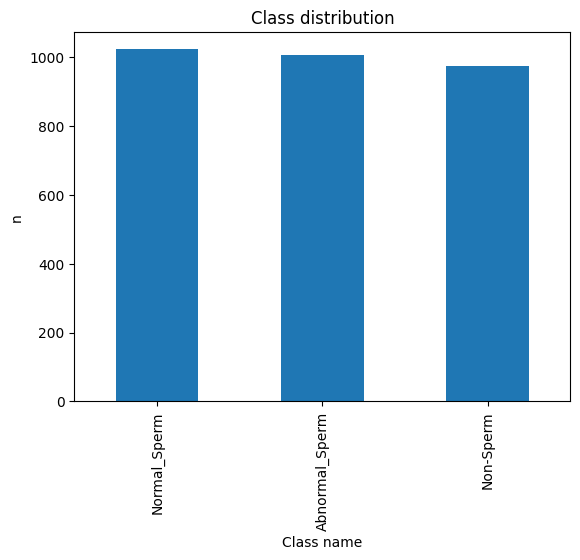

In [15]:
print(df['label'].value_counts())
df['label'].value_counts().plot(kind='bar')
plt.xlabel("Class name")
plt.ylabel("n")
plt.title("Class distribution")
plt.savefig('../images/class_distribution.png')
plt.show()


Number of unique image resolutions: 1914


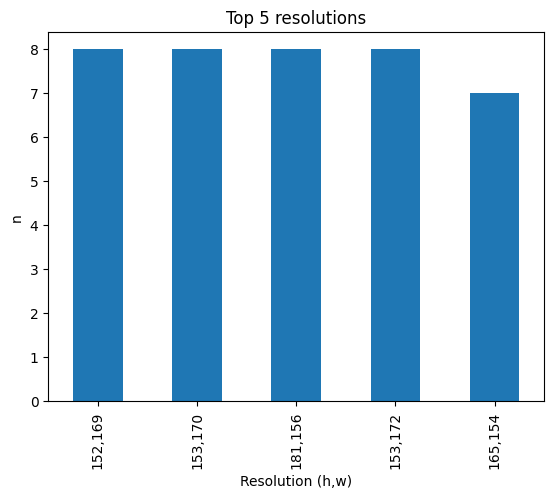

In [45]:
resolutions = []

for image_path in df['file_path']:
    img = cv2.imread(str(image_path))
    h, w, _ = img.shape
    resolutions.append(f"{h},{w}")

resolutions_df = pd.DataFrame(resolutions, columns=["resolutions"])
unique_resolutions = set(resolutions)
print("Number of unique image resolutions:", len(unique_resolutions))
resolutions_df["resolutions"].value_counts().head(5).plot(kind='bar')
plt.xlabel("Resolution (h,w)")
plt.ylabel("n")
plt.title("Top 5 resolutions")
plt.savefig('../images/top_5_resolutions.png')
plt.show()



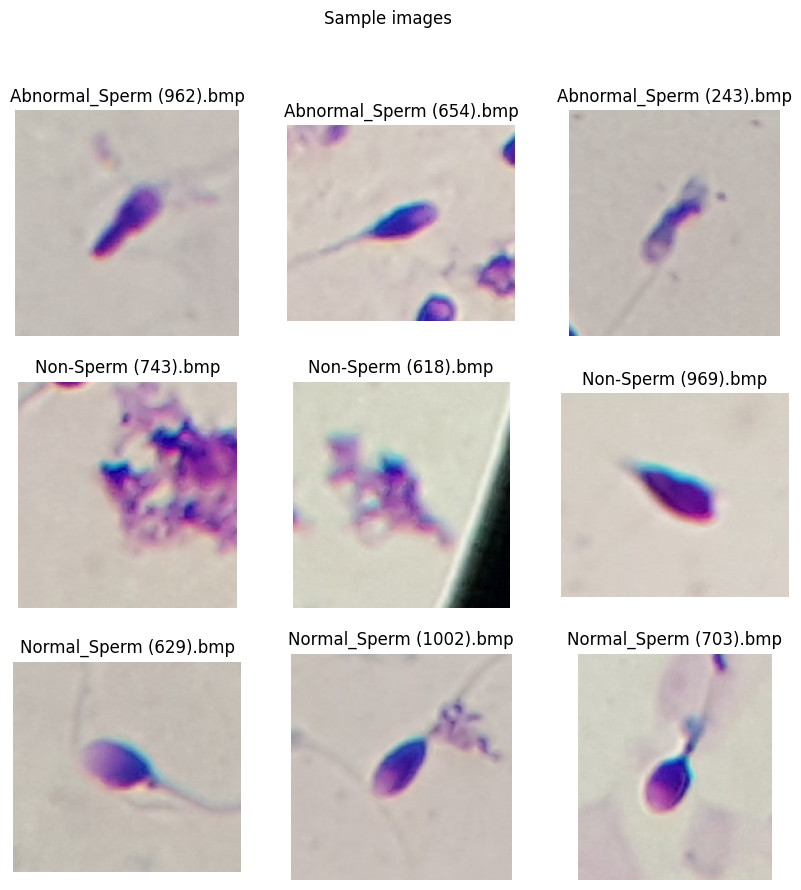

In [35]:
n_images = 3
plt.figure(figsize=(10,10))
image_id = 1

for i, label in enumerate(classes):
    folder_path = os.path.join(data_path, label)
    images_path = os.listdir(folder_path)
    random.shuffle(images_path)
    random_images = images_path[:n_images]
    for j, image_name in enumerate(random_images):
        image_path = os.path.join(folder_path, image_name)
        plt.subplot(len(classes), n_images, image_id)
        image = cv2.imread(image_path)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(image_name)
        image_id += 1
plt.suptitle("Sample images")
plt.savefig(f'../images/sample_images.png')
plt.show()